In [1]:
# to import all the required libraries
import pandas as pd
import numpy as np
from sklearn.impute import SimpleImputer
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import f1_score

In [2]:
# to read the dataset releated to heart disease
df = pd.read_csv('C:/Users/yuvas/Downloads/heart_disease_uci.csv')

In [3]:
# to check the first 5 records in the df
df.head()

,id,age,sex,dataset,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,ca,thal,num
0,1,63,Male,Cleveland,typical angina,145.0,233.0,True,lv hypertrophy,150.0,False,2.3,downsloping,0.0,fixed defect,0
1,2,67,Male,Cleveland,asymptomatic,160.0,286.0,False,lv hypertrophy,108.0,True,1.5,flat,3.0,normal,2
2,3,67,Male,Cleveland,asymptomatic,120.0,229.0,False,lv hypertrophy,129.0,True,2.6,flat,2.0,reversable defect,1
3,4,37,Male,Cleveland,non-anginal,130.0,250.0,False,normal,187.0,False,3.5,downsloping,0.0,normal,0
4,5,41,Female,Cleveland,atypical angina,130.0,204.0,False,lv hypertrophy,172.0,False,1.4,upsloping,0.0,normal,0


In [4]:
# to check the shape of the df
df.shape

(920, 16)

#### inference: there are total 920 records and 16 features are available in the dataset

In [5]:
# to check the info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 920 entries, 0 to 919
Data columns (total 16 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   id        920 non-null    int64  
 1   age       920 non-null    int64  
 2   sex       920 non-null    object 
 3   dataset   920 non-null    object 
 4   cp        920 non-null    object 
 5   trestbps  861 non-null    float64
 6   chol      890 non-null    float64
 7   fbs       830 non-null    object 
 8   restecg   918 non-null    object 
 9   thalch    865 non-null    float64
 10  exang     865 non-null    object 
 11  oldpeak   858 non-null    float64
 12  slope     611 non-null    object 
 13  ca        309 non-null    float64
 14  thal      434 non-null    object 
 15  num       920 non-null    int64  
dtypes: float64(5), int64(3), object(8)
memory usage: 115.1+ KB


#### inference: 
datatype - numerical (check and perform either standardization or normalization) and categorical (check and perform either onehot encoding or label encoding) datatypes are exist in this dataset.

non-null count - missing values are exist for some features like trestbps, chol, fbs, and etc. use mean imputation for numerical features and use mode imputation for categorical features.

In [6]:
# statistical info about the dataset
df.describe()

,id,age,trestbps,chol,thalch,oldpeak,ca,num
count,920.000000,920.000000,861.000000,890.000000,865.000000,858.000000,309.000000,920.000000
mean,460.500000,53.510870,132.132404,199.130337,137.545665,0.878788,0.676375,0.995652
std,265.725422,9.424685,19.066070,110.780810,25.926276,1.091226,0.935653,1.142693
min,1.000000,28.000000,0.000000,0.000000,60.000000,-2.600000,0.000000,0.000000
25%,230.750000,47.000000,120.000000,175.000000,120.000000,0.000000,0.000000,0.000000
50%,460.500000,54.000000,130.000000,223.000000,140.000000,0.500000,0.000000,1.000000
75%,690.250000,60.000000,140.000000,268.000000,157.000000,1.500000,1.000000,2.000000
max,920.000000,77.000000,200.000000,603.000000,202.000000,6.200000,3.000000,4.000000


# Step 1 - Data preprocessing techniques

## Data cleaning:

### Handling Missing Values In Columns

In [7]:
# it is used to display the null values of data
df.isnull().sum()

id            0
age           0
sex           0
dataset       0
cp            0
trestbps     59
chol         30
fbs          90
restecg       2
thalch       55
exang        55
oldpeak      62
slope       309
ca          611
thal        486
num           0
dtype: int64

In [8]:
# imputing the null-values
imputer = SimpleImputer(strategy='mean')
df[['trestbps', 'chol', 'thalch', 'oldpeak', 'ca']] = imputer.fit_transform(df[['trestbps', 'chol', 'thalch', 'oldpeak', 'ca']])

imputer = SimpleImputer(strategy='most_frequent')
df[['fbs', 'restecg', 'exang', 'slope', 'thal']] = imputer.fit_transform(df[['fbs', 'restecg', 'exang', 'slope', 'thal']])

In [9]:
# checking for null-values after imputation
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 920 entries, 0 to 919
Data columns (total 16 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   id        920 non-null    int64  
 1   age       920 non-null    int64  
 2   sex       920 non-null    object 
 3   dataset   920 non-null    object 
 4   cp        920 non-null    object 
 5   trestbps  920 non-null    float64
 6   chol      920 non-null    float64
 7   fbs       920 non-null    object 
 8   restecg   920 non-null    object 
 9   thalch    920 non-null    float64
 10  exang     920 non-null    object 
 11  oldpeak   920 non-null    float64
 12  slope     920 non-null    object 
 13  ca        920 non-null    float64
 14  thal      920 non-null    object 
 15  num       920 non-null    int64  
dtypes: float64(5), int64(3), object(8)
memory usage: 115.1+ KB


#### inference: here all the null-values have been imputed.

### Handling Duplicate Records In Rows

In [10]:
# Get The Number Of Duplicated Entries
duplicates = df[df.duplicated()]
print(duplicates)

# Print The Number Of Duplicated Entries
print("No. of duplicated entries: ", len(duplicates))


Empty DataFrame
Columns: [id, age, sex, dataset, cp, trestbps, chol, fbs, restecg, thalch, exang, oldpeak, slope, ca, thal, num]
Index: []
No. of duplicated entries:  0


### Check number of unique values for each column , unwanted columns and check if there is any running sequence number (like patient Id, etc). If so then drop those columns

In [11]:
# Get number of unique values in each column
num_unique = df.nunique()

# Print number of unique values in each column
print(num_unique)

# Get column names containing running sequence numbers
seq_cols = [col for col in df.columns if df[col].nunique() == len(df)]

# Print names of columns containing running sequence numbers
print(seq_cols)

# Drop columns containing running sequence numbers
df.drop(seq_cols, axis=1, inplace=True)


id          920
age          50
sex           2
dataset       4
cp            4
trestbps     62
chol        218
fbs           2
restecg       3
thalch      120
exang         2
oldpeak      54
slope         3
ca            5
thal          3
num           5
dtype: int64
['id']


In [12]:
#dropping unwanted column
df.drop('dataset', axis=1, inplace=True)

inference : "The 'dataset' column is not relevant in determining whether a patient has heart disease or not."('dataset', It simply specifies the source of the data)


This indicates that the dataset column doesn't provide any information related to the target variable, which is the presence or absence of heart disease.

### The original dataset includes the target variable with values ranging from 0 to 4, which is not suitable for our purpose of identifying the presence of heart disease using binary classification. Therefore, we will convert all the values in the 'num' column to 1 or 0 to represent the presence or absence of heart disease, respectively.

In [13]:
df.num[df.num > 0] = 1

C:\Users\yuvas\AppData\Local\Temp\ipykernel_12712\3027769952.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.num[df.num > 0] = 1


In [14]:
df.num.value_counts(True)*100

1    55.326087
0    44.673913
Name: num, dtype: float64

#### inference: the value of 0 in the 'num' column indicates the absence of heart disease, while a value of 1 indicates the presence of heart disease. 
#### Based on the dataset, it can be concluded that the proportion of patients with heart disease and without heart disease is roughly balanced.

In [15]:
# display df after all the data cleaning process
df

,age,sex,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,ca,thal,num
0,63,Male,typical angina,145.000000,233.0,True,lv hypertrophy,150.000000,False,2.300000,downsloping,0.000000,fixed defect,0
1,67,Male,asymptomatic,160.000000,286.0,False,lv hypertrophy,108.000000,True,1.500000,flat,3.000000,normal,1
2,67,Male,asymptomatic,120.000000,229.0,False,lv hypertrophy,129.000000,True,2.600000,flat,2.000000,reversable defect,1
3,37,Male,non-anginal,130.000000,250.0,False,normal,187.000000,False,3.500000,downsloping,0.000000,normal,0
4,41,Female,atypical angina,130.000000,204.0,False,lv hypertrophy,172.000000,False,1.400000,upsloping,0.000000,normal,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
915,54,Female,asymptomatic,127.000000,333.0,True,st-t abnormality,154.000000,False,0.000000,flat,0.676375,normal,1
916,62,Male,typical angina,132.132404,139.0,False,st-t abnormality,137.545665,False,0.878788,flat,0.676375,normal,0
917,55,Male,asymptomatic,122.000000,223.0,True,st-t abnormality,100.000000,False,0.000000,flat,0.676375,fixed defect,1
918,58,Male,asymptomatic,132.132404,385.0,True,lv hypertrophy,137.545665,False,0.878788,flat,0.676375,normal,0


# Step 2 - EDA (Exploratory data analysis)

### Univariate analysis

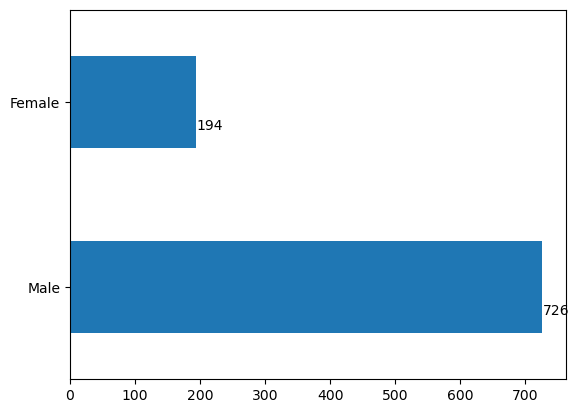

In [16]:
# Let us analyse the 'sex' feature

ax=df.sex.value_counts().plot.barh()
for i in ax.patches:
    plt.text(i.get_width()+0.1, i.get_y()+0.1, str(i.get_width()))

#### inference:  we can see that the dataset contains more males than females

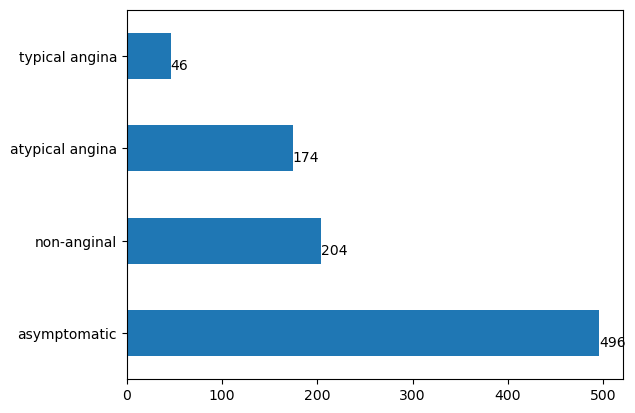

In [17]:
#Let us analyse the 'cp' feature

ax=df.cp.value_counts().plot.barh()
for i in ax.patches:
    plt.text(i.get_width()+0.1, i.get_y()+0.1, str(i.get_width()))

#### inference: we can see that 'asymptomatic' is more compared to all the other types of cp

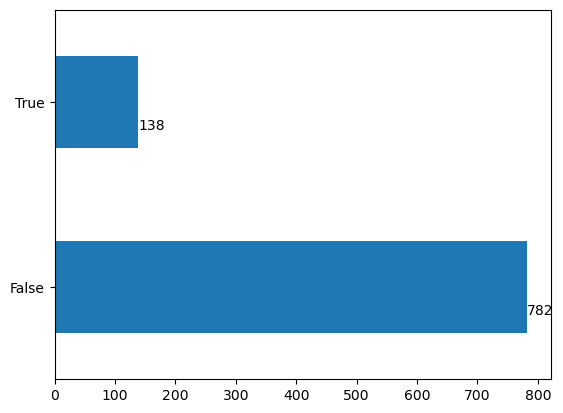

In [18]:
# Let us analyse the 'fbs' feature

ax=df.fbs.value_counts().plot.barh()
for i in ax.patches:
    plt.text(i.get_width()+0.1, i.get_y()+0.1, str(i.get_width()))

#### inference:as we can see that more patients are having <120 level of fbs

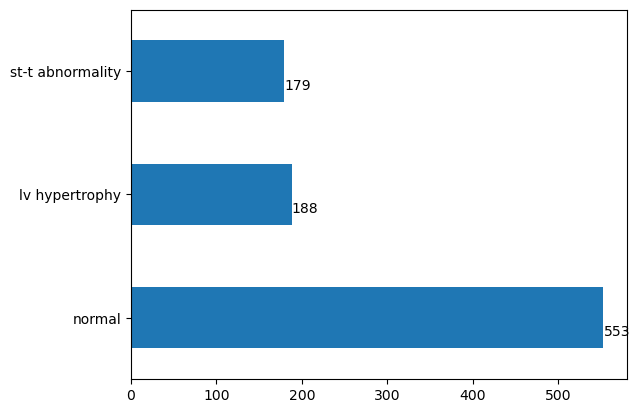

In [19]:
# Let us analyse the 'restecg' feature

ax=df.restecg.value_counts().plot.barh()
for i in ax.patches:
    plt.text(i.get_width()+0.1, i.get_y()+0.1, str(i.get_width()))

#### inference:we can see that 'normal' is more as campared to the other types of restecg

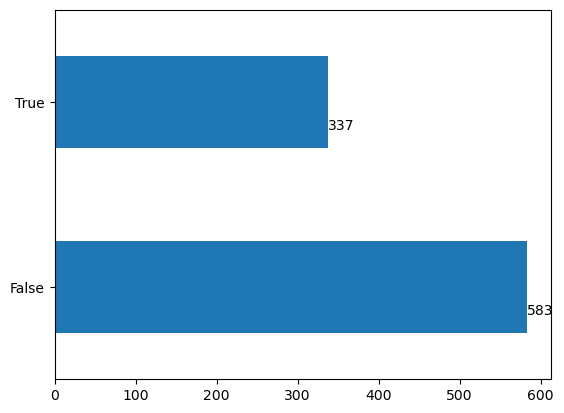

In [20]:
# Let us analyse the 'exang' feature

ax=df.exang.value_counts().plot.barh()
for i in ax.patches:
    plt.text(i.get_width()+0.1, i.get_y()+0.1, str(i.get_width()))

#### inference:chest pain or discomfort that occurs during physical activity or exercise is  less than the non physical activities.

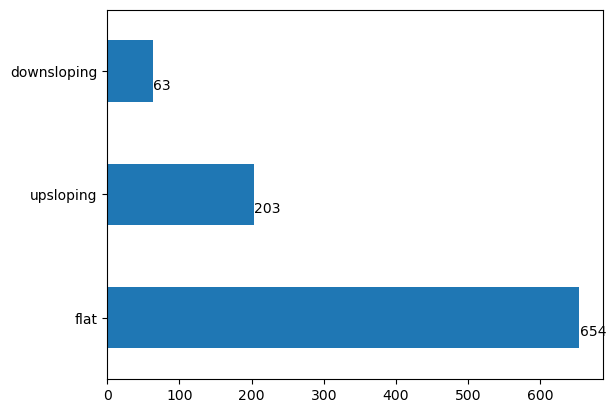

In [21]:
# Let us analyse the 'slope' feature

ax=df.slope.value_counts().plot.barh()
for i in ax.patches:
    plt.text(i.get_width()+0.1, i.get_y()+0.1, str(i.get_width()))

#### inference:we can see that the slope of the peak exercise ST segment type 'flat' is more than the other types

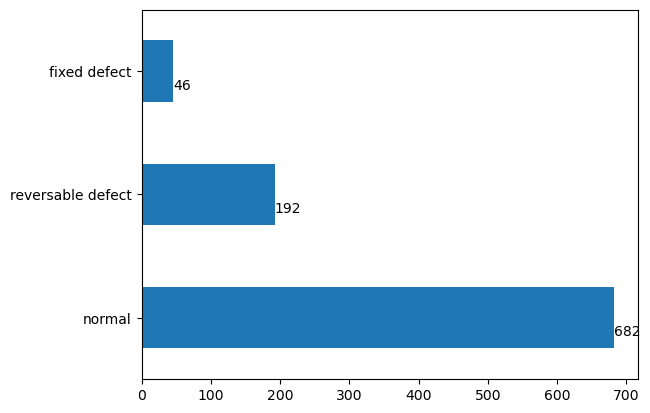

In [22]:
# Let us analyse the 'thal' feature 

ax=df.thal.value_counts().plot.barh()
for i in ax.patches:
    plt.text(i.get_width()+0.1, i.get_y()+0.1, str(i.get_width()))

#### inference: we can see that the 'normal' value of thal is more as compared all the other types

### Bivariate analysis

### Analysing the 'Sex' feature with respect to num variable (target)

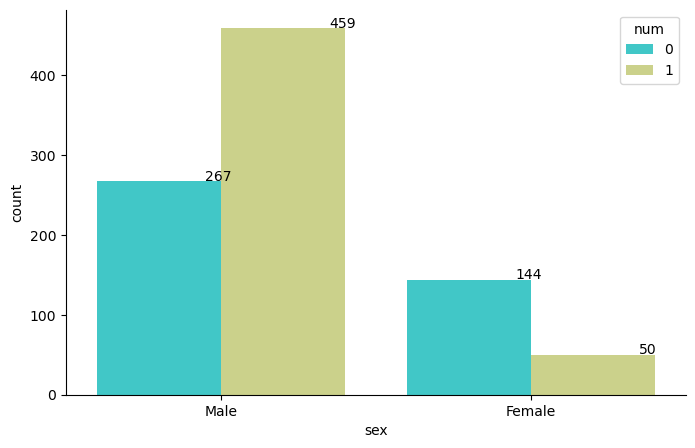

In [23]:
plt.figure(figsize=(8,5))
ax=sns.countplot(x='sex',data=df, palette='rainbow',hue='num')
for p in ax.patches:
    ax.annotate('{:.0f}'.format(p.get_height()), (p.get_x()+0.35, p.get_height()+1))

sns.despine()

#### Inference: We notice, that males are more likely to have heart problems than females

### Analysing the 'cp' feature with respect to num variable (target)

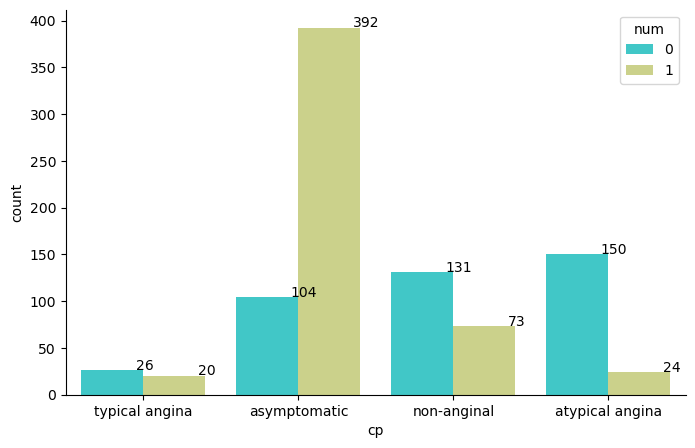

In [24]:
plt.figure(figsize=(8,5))
ax=sns.countplot(x='cp',data=df, palette='rainbow',hue='num')
for p in ax.patches:
    ax.annotate('{:.0f}'.format(p.get_height()), (p.get_x()+0.35, p.get_height()+1))

sns.despine()

#### Inference: We notice,that patients with chest pain classified as "asymptomatic" are more likely to have heart disease compared to patients with other types of chest pain.

### Analysing the 'fbs' feature with respect to num variable (target)

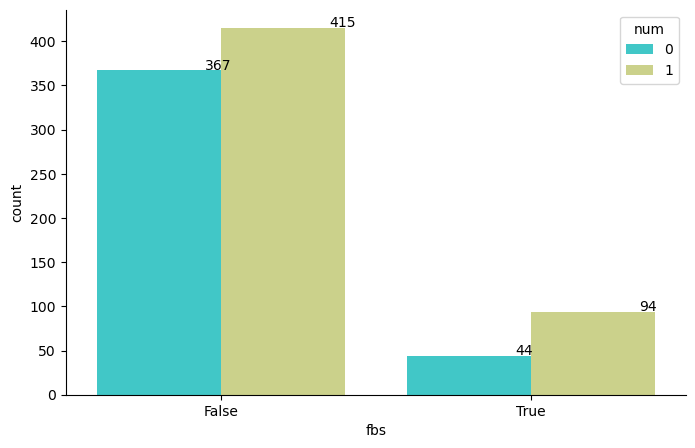

In [25]:
plt.figure(figsize=(8,5))
ax=sns.countplot(x='fbs',data=df, palette='rainbow',hue='num')
for p in ax.patches:
    ax.annotate('{:.0f}'.format(p.get_height()), (p.get_x()+0.35, p.get_height()+1))

sns.despine()

#### inference:
#### fbs = 
   #### True if fasting blood sugar > 120 mg/dl 
   #### False if fasting blood sugar < 120 mg/dl 

#### Patients with less FBS (<120) are having more heart disease when compared to patients with more FBS (>120)

### Analysing the 'restecg' feature with respect to num variable (target)

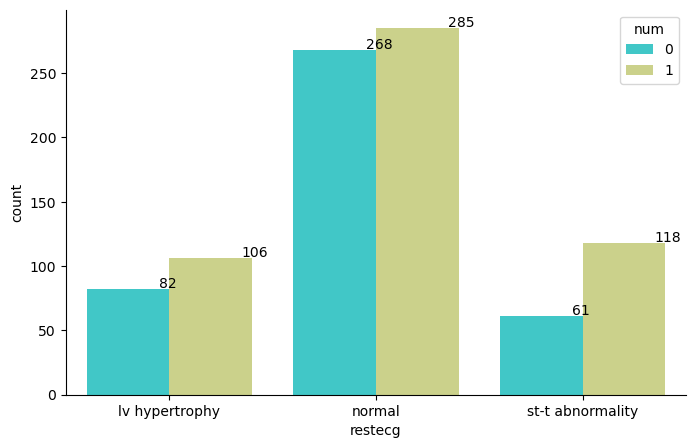

In [26]:
plt.figure(figsize=(8,5))
ax=sns.countplot(x='restecg',data=df, palette='rainbow',hue='num')
for p in ax.patches:
    ax.annotate('{:.0f}'.format(p.get_height()), (p.get_x()+0.35, p.get_height()+1))

sns.despine()

#### inference: we can see that the 'normal restecg' heart patients are more as compare to the others

### Analysing the 'exang' feature with respect to num variable (target)

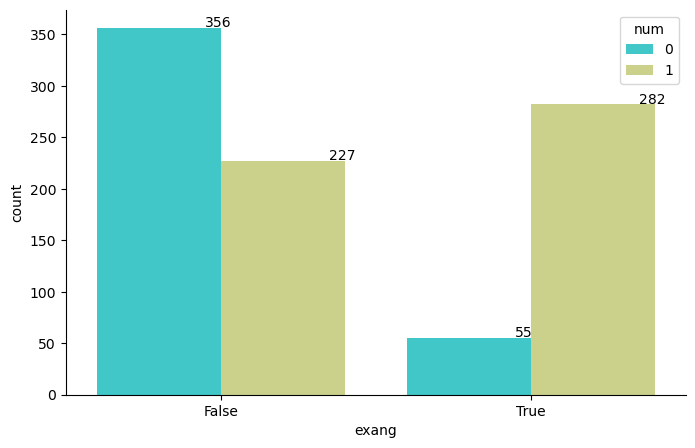

In [27]:
plt.figure(figsize=(8,5))
ax=sns.countplot(x='exang',data=df, palette='rainbow',hue='num')
for p in ax.patches:
    ax.annotate('{:.0f}'.format(p.get_height()), (p.get_x()+0.35, p.get_height()+1))

sns.despine()

#### inference:chest pain or discomfort that occurs during physical activity or exercise is more when compared to non physical activity

### Analysing the 'slope' feature with respect to num variable (target)

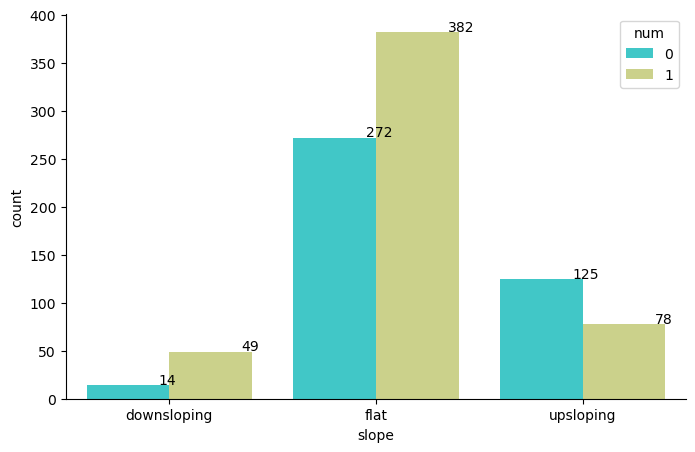

In [28]:
plt.figure(figsize=(8,5))
ax=sns.countplot(x='slope',data=df, palette='rainbow',hue='num')
for p in ax.patches:
    ax.annotate('{:.0f}'.format(p.get_height()), (p.get_x()+0.35, p.get_height()+1))

sns.despine()

#### inference:the patients with 'flat scope' more likely to have heart disease

### Analysing the 'thal' feature with respect to num variable (target)

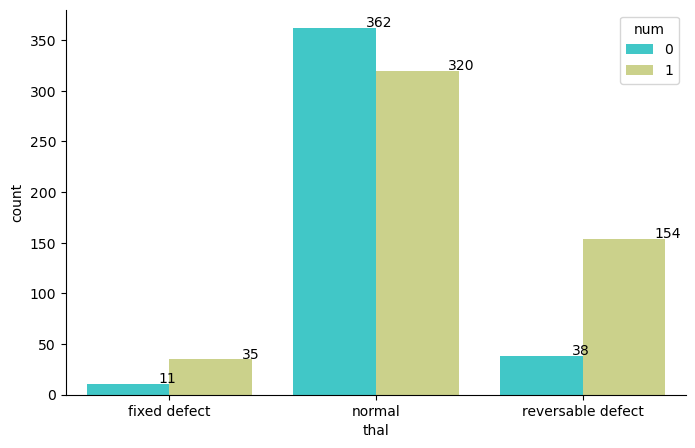

In [29]:
plt.figure(figsize=(8,5))
ax=sns.countplot(x='thal',data=df, palette='rainbow',hue='num')
for p in ax.patches:
    ax.annotate('{:.0f}'.format(p.get_height()), (p.get_x()+0.35, p.get_height()+1))

sns.despine()

#### inference:the patients with 'normal thal' more likely to have heart disease

In [30]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,ca,thal,num
0,63,Male,typical angina,145.0,233.0,True,lv hypertrophy,150.0,False,2.3,downsloping,0.0,fixed defect,0
1,67,Male,asymptomatic,160.0,286.0,False,lv hypertrophy,108.0,True,1.5,flat,3.0,normal,1
2,67,Male,asymptomatic,120.0,229.0,False,lv hypertrophy,129.0,True,2.6,flat,2.0,reversable defect,1
3,37,Male,non-anginal,130.0,250.0,False,normal,187.0,False,3.5,downsloping,0.0,normal,0
4,41,Female,atypical angina,130.0,204.0,False,lv hypertrophy,172.0,False,1.4,upsloping,0.0,normal,0


In [31]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 920 entries, 0 to 919
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       920 non-null    int64  
 1   sex       920 non-null    object 
 2   cp        920 non-null    object 
 3   trestbps  920 non-null    float64
 4   chol      920 non-null    float64
 5   fbs       920 non-null    object 
 6   restecg   920 non-null    object 
 7   thalch    920 non-null    float64
 8   exang     920 non-null    object 
 9   oldpeak   920 non-null    float64
 10  slope     920 non-null    object 
 11  ca        920 non-null    float64
 12  thal      920 non-null    object 
 13  num       920 non-null    int64  
dtypes: float64(5), int64(2), object(7)
memory usage: 100.8+ KB


# Step 3 - Feature Engineering
The numeric and categorical fields need to be treated separately and the target field needs to be separated from the training dataset. The following few steps separate the numeric and categorical fields and drops the target field 'num' from the feature set.

In [32]:
#Extracting the Numeric and Categorical features
cat_cols = df.select_dtypes(['object']).columns
num_cols=[]
for col in df.columns:
    if not col in cat_cols:
        num_cols.append(col)
print(cat_cols,num_cols)


Index(['sex', 'cp', 'fbs', 'restecg', 'exang', 'slope', 'thal'], dtype='object') ['age', 'trestbps', 'chol', 'thalch', 'oldpeak', 'ca', 'num']


In [33]:
df[num_cols]        

,age,trestbps,chol,thalch,oldpeak,ca,num
0,63,145.000000,233.0,150.000000,2.300000,0.000000,0
1,67,160.000000,286.0,108.000000,1.500000,3.000000,1
2,67,120.000000,229.0,129.000000,2.600000,2.000000,1
3,37,130.000000,250.0,187.000000,3.500000,0.000000,0
4,41,130.000000,204.0,172.000000,1.400000,0.000000,0
...,...,...,...,...,...,...,...
915,54,127.000000,333.0,154.000000,0.000000,0.676375,1
916,62,132.132404,139.0,137.545665,0.878788,0.676375,0
917,55,122.000000,223.0,100.000000,0.000000,0.676375,1
918,58,132.132404,385.0,137.545665,0.878788,0.676375,0


In [34]:
df[cat_cols]

,sex,cp,fbs,restecg,exang,slope,thal
0,Male,typical angina,True,lv hypertrophy,False,downsloping,fixed defect
1,Male,asymptomatic,False,lv hypertrophy,True,flat,normal
2,Male,asymptomatic,False,lv hypertrophy,True,flat,reversable defect
3,Male,non-anginal,False,normal,False,downsloping,normal
4,Female,atypical angina,False,lv hypertrophy,False,upsloping,normal
...,...,...,...,...,...,...,...
915,Female,asymptomatic,True,st-t abnormality,False,flat,normal
916,Male,typical angina,False,st-t abnormality,False,flat,normal
917,Male,asymptomatic,True,st-t abnormality,False,flat,fixed defect
918,Male,asymptomatic,True,lv hypertrophy,False,flat,normal


In [35]:
# Creating Dummy Variables For All Categorical Variables
OneHot = OneHotEncoder(drop='first', dtype=int).fit(df[cat_cols])

# Transorm Training Data
df_cat_encoded = pd.DataFrame(OneHot.transform(df[cat_cols]).toarray(), columns=OneHot.get_feature_names_out(cat_cols))

df_cat_encoded.head(5)

,sex_Male,cp_atypical angina,cp_non-anginal,cp_typical angina,fbs_True,restecg_normal,restecg_st-t abnormality,exang_True,slope_flat,slope_upsloping,thal_normal,thal_reversable defect
0,1,0,0,1,1,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,1,1,0,1,0
2,1,0,0,0,0,0,0,1,1,0,0,1
3,1,0,1,0,0,1,0,0,0,0,1,0
4,0,1,0,0,0,0,0,0,0,1,1,0


In [36]:
df_cat_encoded.shape

(920, 12)

In [37]:
df_final = pd.concat([df[num_cols], df_cat_encoded],axis=1)

In [38]:
df_final

,age,trestbps,chol,thalch,oldpeak,ca,num,sex_Male,cp_atypical angina,cp_non-anginal,cp_typical angina,fbs_True,restecg_normal,restecg_st-t abnormality,exang_True,slope_flat,slope_upsloping,thal_normal,thal_reversable defect
0,63,145.000000,233.0,150.000000,2.300000,0.000000,0,1,0,0,1,1,0,0,0,0,0,0,0
1,67,160.000000,286.0,108.000000,1.500000,3.000000,1,1,0,0,0,0,0,0,1,1,0,1,0
2,67,120.000000,229.0,129.000000,2.600000,2.000000,1,1,0,0,0,0,0,0,1,1,0,0,1
3,37,130.000000,250.0,187.000000,3.500000,0.000000,0,1,0,1,0,0,1,0,0,0,0,1,0
4,41,130.000000,204.0,172.000000,1.400000,0.000000,0,0,1,0,0,0,0,0,0,0,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
915,54,127.000000,333.0,154.000000,0.000000,0.676375,1,0,0,0,0,1,0,1,0,1,0,1,0
916,62,132.132404,139.0,137.545665,0.878788,0.676375,0,1,0,0,1,0,0,1,0,1,0,1,0
917,55,122.000000,223.0,100.000000,0.000000,0.676375,1,1,0,0,0,1,0,1,0,1,0,0,0
918,58,132.132404,385.0,137.545665,0.878788,0.676375,0,1,0,0,0,1,0,0,0,1,0,1,0


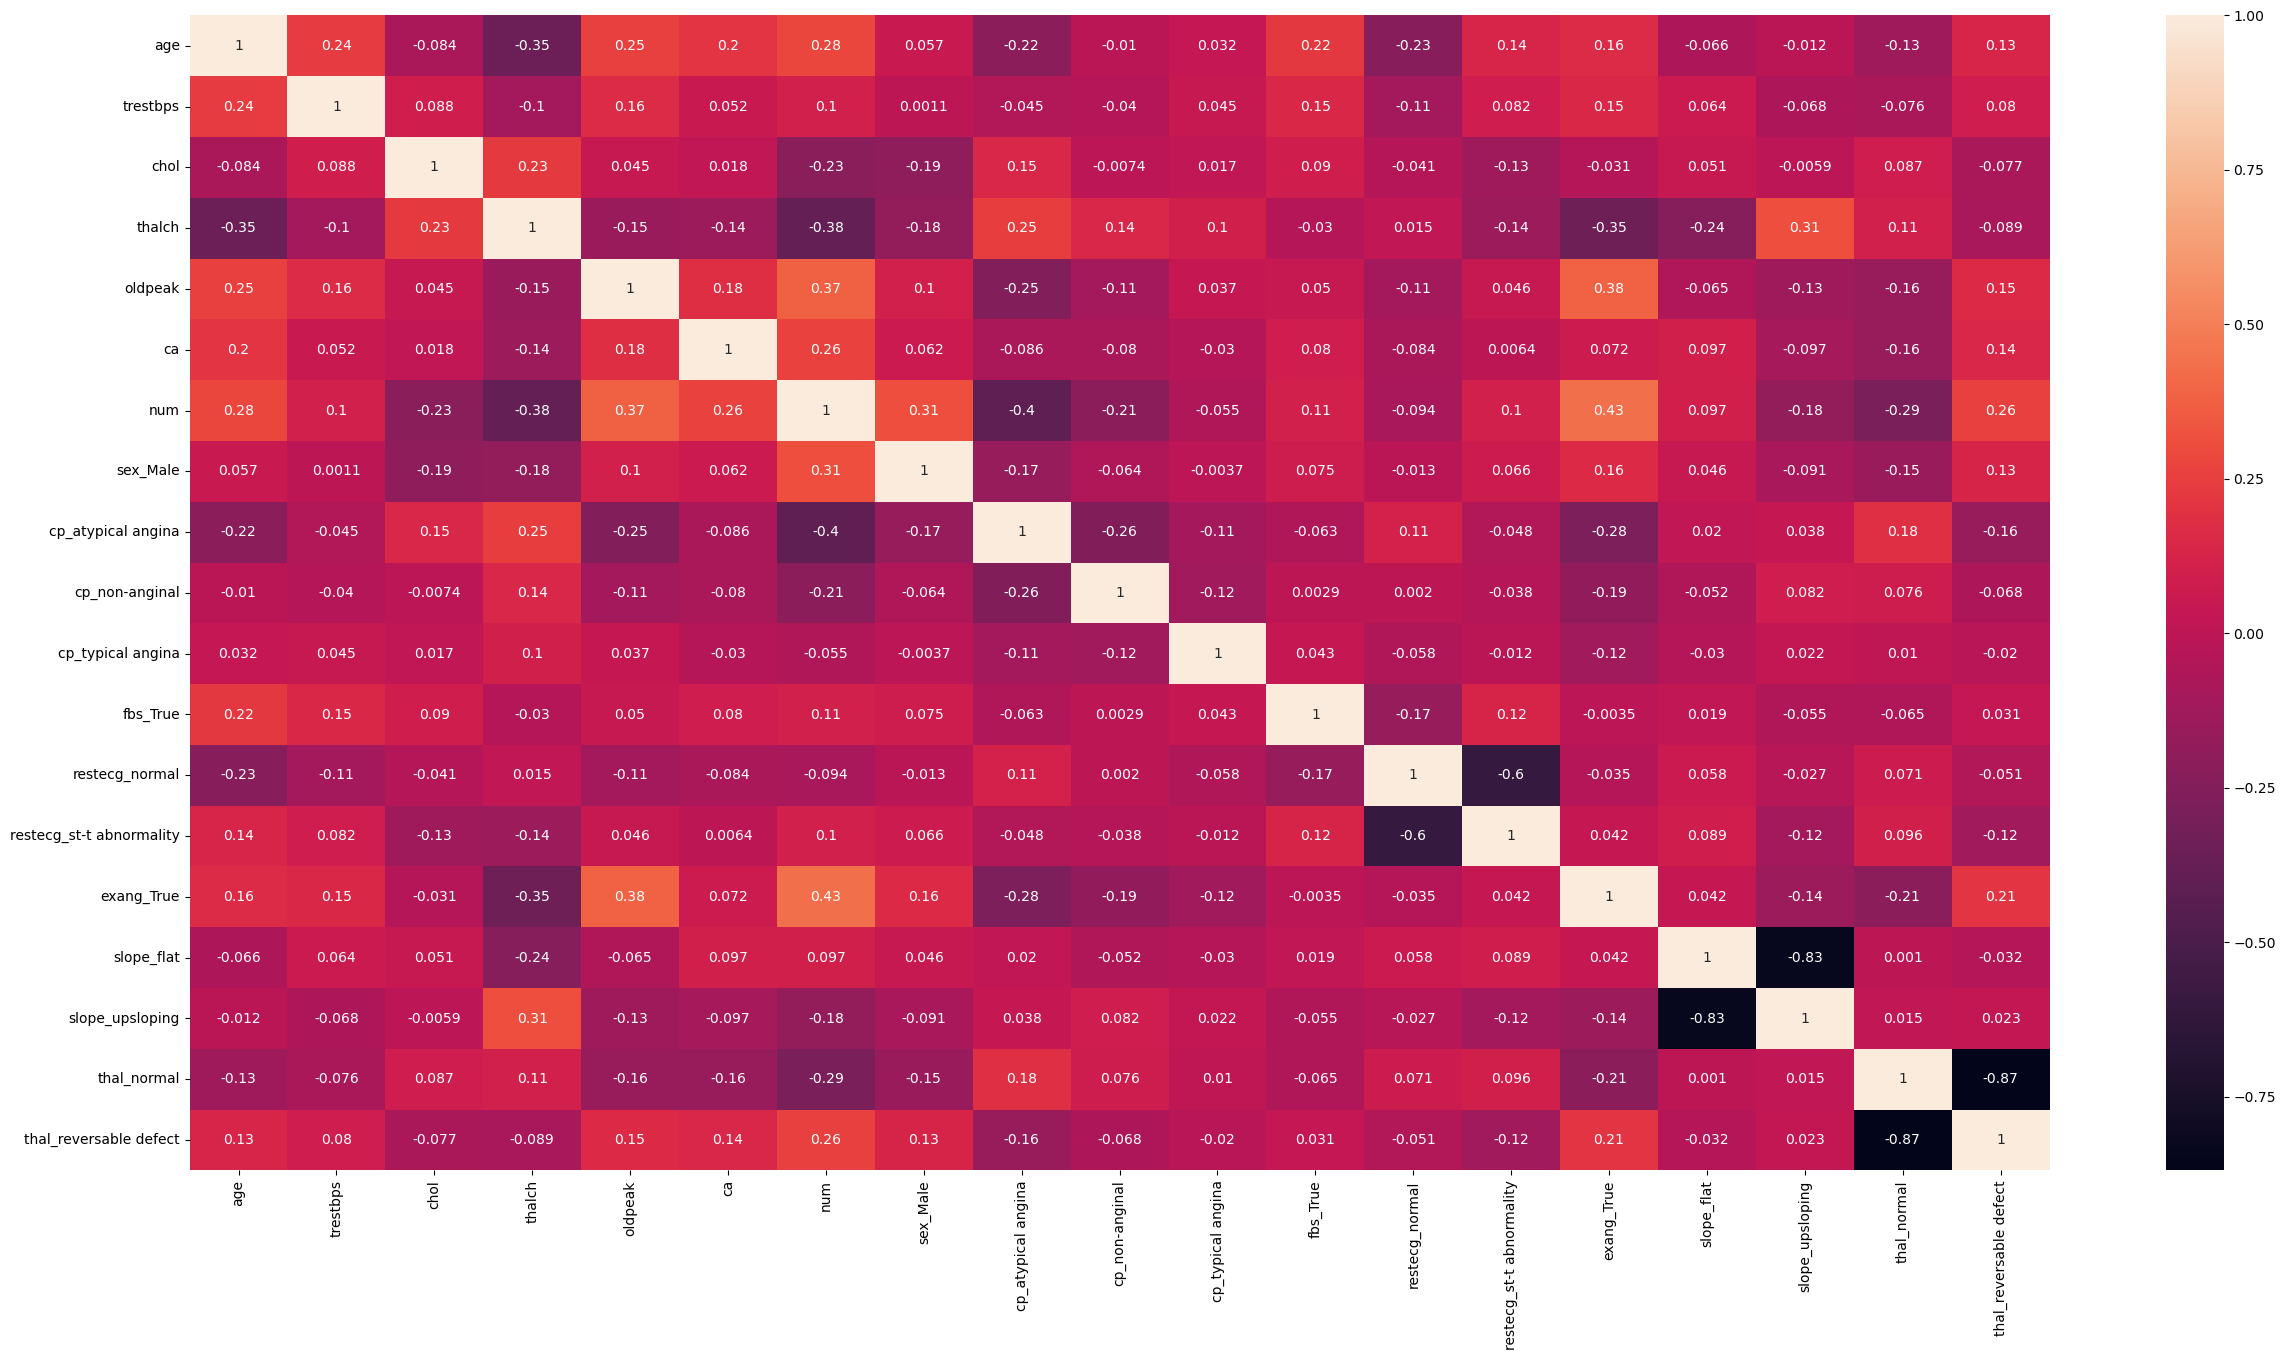

In [39]:
# Let's see the correlation matrix 
plt.figure(figsize = (30,15))        # Size of the figure
sns.heatmap(df_final.corr(),annot = True)
plt.show()

#### inference:
'slop_flat and slope_upsloping' are highly negatively correlated (-0.83)  with each other. so, removing one of the feature (slope_flat) .

'thal_normal and thal_reversable defect' are highly negatively correlated (-0.87) with each other.so, removing one of the feature (thal_normal) .

In [40]:
df_final.drop(['slope_flat','thal_normal'], axis=1, inplace=True)

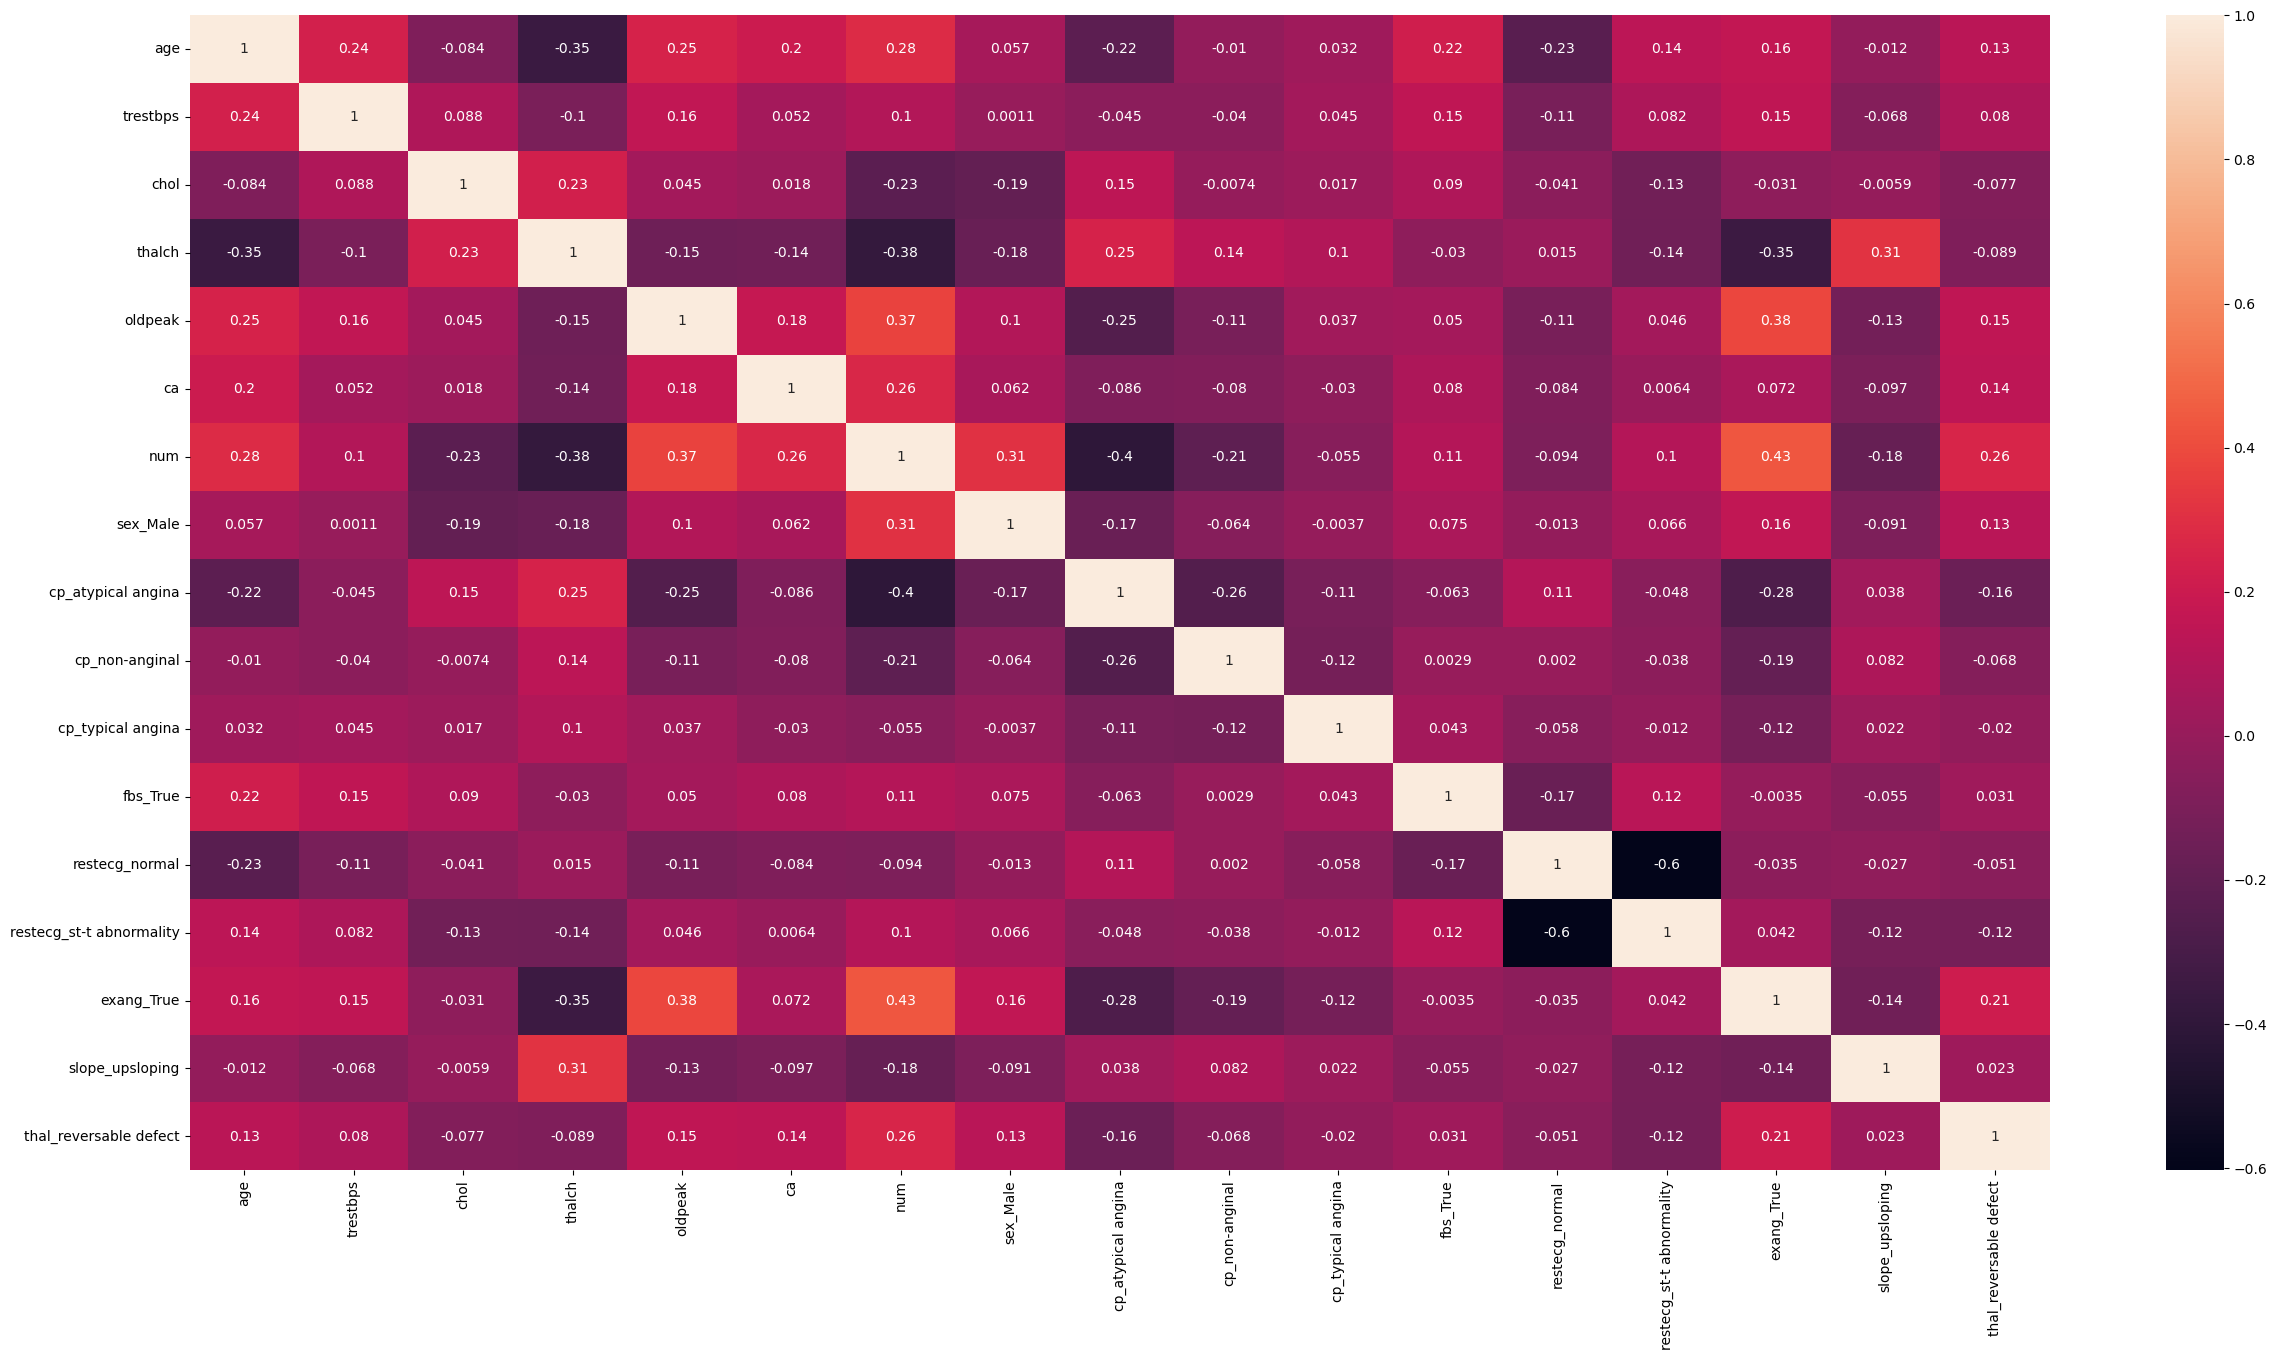

In [41]:
# check the correlation matrix after removing the highly correlated features
plt.figure(figsize = (30,15))        # Size of the figure
sns.heatmap(df_final.corr(),annot = True)
plt.show()

In [42]:
df_final.shape

(920, 17)

In [43]:
df_final

,age,trestbps,chol,thalch,oldpeak,ca,num,sex_Male,cp_atypical angina,cp_non-anginal,cp_typical angina,fbs_True,restecg_normal,restecg_st-t abnormality,exang_True,slope_upsloping,thal_reversable defect
0,63,145.000000,233.0,150.000000,2.300000,0.000000,0,1,0,0,1,1,0,0,0,0,0
1,67,160.000000,286.0,108.000000,1.500000,3.000000,1,1,0,0,0,0,0,0,1,0,0
2,67,120.000000,229.0,129.000000,2.600000,2.000000,1,1,0,0,0,0,0,0,1,0,1
3,37,130.000000,250.0,187.000000,3.500000,0.000000,0,1,0,1,0,0,1,0,0,0,0
4,41,130.000000,204.0,172.000000,1.400000,0.000000,0,0,1,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
915,54,127.000000,333.0,154.000000,0.000000,0.676375,1,0,0,0,0,1,0,1,0,0,0
916,62,132.132404,139.0,137.545665,0.878788,0.676375,0,1,0,0,1,0,0,1,0,0,0
917,55,122.000000,223.0,100.000000,0.000000,0.676375,1,1,0,0,0,1,0,1,0,0,0
918,58,132.132404,385.0,137.545665,0.878788,0.676375,0,1,0,0,0,1,0,0,0,0,0


In [44]:
df_final['num']

0      0
1      1
2      1
3      0
4      0
      ..
915    1
916    0
917    1
918    0
919    1
Name: num, Length: 920, dtype: int64

In [45]:
#Extracting the target variable - 'num'
y = df_final.pop('num')

In [46]:
X = df_final

In [47]:
y

0      0
1      1
2      1
3      0
4      0
      ..
915    1
916    0
917    1
918    0
919    1
Name: num, Length: 920, dtype: int64

In [48]:
X

,age,trestbps,chol,thalch,oldpeak,ca,sex_Male,cp_atypical angina,cp_non-anginal,cp_typical angina,fbs_True,restecg_normal,restecg_st-t abnormality,exang_True,slope_upsloping,thal_reversable defect
0,63,145.000000,233.0,150.000000,2.300000,0.000000,1,0,0,1,1,0,0,0,0,0
1,67,160.000000,286.0,108.000000,1.500000,3.000000,1,0,0,0,0,0,0,1,0,0
2,67,120.000000,229.0,129.000000,2.600000,2.000000,1,0,0,0,0,0,0,1,0,1
3,37,130.000000,250.0,187.000000,3.500000,0.000000,1,0,1,0,0,1,0,0,0,0
4,41,130.000000,204.0,172.000000,1.400000,0.000000,0,1,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
915,54,127.000000,333.0,154.000000,0.000000,0.676375,0,0,0,0,1,0,1,0,0,0
916,62,132.132404,139.0,137.545665,0.878788,0.676375,1,0,0,1,0,0,1,0,0,0
917,55,122.000000,223.0,100.000000,0.000000,0.676375,1,0,0,0,1,0,1,0,0,0
918,58,132.132404,385.0,137.545665,0.878788,0.676375,1,0,0,0,1,0,0,0,0,0


### Train and Test Split

The data is next split into training and test dataset using the train_test_split functionality of sklearn.

In [49]:
#Splitting into Train and Test dataset in 70-30 ratio
X_train, X_test, y_train, y_test = train_test_split(X,y,train_size = 0.7, random_state = 0, stratify = y)
print("Shape of X Train: ",X_train.shape)
print("Shape of X Test: ",X_test.shape)
print("Shape of y Train: ",y_train.shape)
print("Shape of y Test: ",y_test.shape)


Shape of X Train:  (644, 16)
Shape of X Test:  (276, 16)
Shape of y Train:  (644,)
Shape of y Test:  (276,)


### Scaling Numeric Fields
perform scaling to normalize the numerical features

In [50]:
num_cols.remove('num')

In [51]:
num_cols

['age', 'trestbps', 'chol', 'thalch', 'oldpeak', 'ca']

In [52]:
df[num_cols]

,age,trestbps,chol,thalch,oldpeak,ca
0,63,145.000000,233.0,150.000000,2.300000,0.000000
1,67,160.000000,286.0,108.000000,1.500000,3.000000
2,67,120.000000,229.0,129.000000,2.600000,2.000000
3,37,130.000000,250.0,187.000000,3.500000,0.000000
4,41,130.000000,204.0,172.000000,1.400000,0.000000
...,...,...,...,...,...,...
915,54,127.000000,333.0,154.000000,0.000000,0.676375
916,62,132.132404,139.0,137.545665,0.878788,0.676375
917,55,122.000000,223.0,100.000000,0.000000,0.676375
918,58,132.132404,385.0,137.545665,0.878788,0.676375


In [53]:
scaler = StandardScaler()

In [54]:
scaler.fit(X_train[num_cols])
X_train[num_cols] = scaler.transform(X_train[num_cols])

In [55]:
X_train

,age,trestbps,chol,thalch,oldpeak,ca,sex_Male,cp_atypical angina,cp_non-anginal,cp_typical angina,fbs_True,restecg_normal,restecg_st-t abnormality,exang_True,slope_upsloping,thal_reversable defect
890,-0.019067,-0.447590,0.413756,-0.605901,1.039393,0.009985,1,0,0,0,0,1,0,1,0,1
468,0.196361,0.404012,0.286804,-1.075320,-0.359749,0.009985,1,0,0,0,0,1,0,1,0,0
490,0.950362,0.404012,0.667662,0.567644,0.106632,0.009985,1,1,0,0,0,1,0,0,1,0
824,1.165791,-0.128239,0.232395,-0.371192,-0.359749,0.009985,1,0,0,0,0,0,1,0,0,0
762,0.842648,-0.014742,-1.789779,-2.014156,0.573012,0.009985,1,0,0,0,1,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
496,-1.742497,0.404012,0.087307,-0.292956,0.573012,0.009985,1,0,0,0,0,1,0,1,0,0
99,-0.557639,-0.554040,0.223327,1.897662,-0.826129,-1.261458,1,0,0,0,0,0,0,0,1,0
631,-0.234496,0.404012,-1.789779,-3.031229,-0.826129,0.009985,1,0,0,0,0,1,0,0,0,0
810,2.350649,0.191112,0.250531,-0.997083,1.972154,0.009985,1,0,0,0,0,1,0,1,0,0


In [56]:
X_test[num_cols] = scaler.transform(X_test[num_cols])

In [57]:
X_test

,age,trestbps,chol,thalch,oldpeak,ca,sex_Male,cp_atypical angina,cp_non-anginal,cp_typical angina,fbs_True,restecg_normal,restecg_st-t abnormality,exang_True,slope_upsloping,thal_reversable defect
560,-0.557639,0.297562,0.150783,-1.153556,0.573012,0.009985,0,0,0,0,0,1,0,1,0,0
530,-1.527069,-1.192742,0.749274,0.489408,-0.826129,0.009985,1,0,0,0,0,1,0,0,0,0
165,0.411790,-0.021789,0.087307,1.193535,-0.826129,-1.261458,1,0,0,0,0,1,0,1,1,1
797,-0.234496,-0.014742,1.284289,0.002217,-0.006430,0.009985,1,0,1,0,0,1,0,0,0,0
690,0.950362,-0.660490,-1.789779,-0.566783,0.759565,0.009985,0,0,0,0,0,0,1,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
418,-0.342211,0.936264,0.159851,0.098226,-0.826129,0.009985,1,0,0,0,0,1,0,1,0,0
636,-0.126782,-1.991119,-1.789779,-2.170629,-0.006430,0.009985,1,0,0,0,0,1,0,1,0,0
832,-0.449925,-0.014742,-0.502116,0.002217,-0.006430,0.009985,1,0,1,0,0,1,0,0,0,0
801,0.842648,0.723363,0.395620,0.411171,1.972154,0.009985,1,0,0,0,0,1,0,1,0,0


inference:
        feature scaling is used to bring all the data in the same range.
        here it is done using standadization

# Step 4 - Model training and prediction

## Exp 1: DecisionTreeClassifier - Base Model

In [58]:
dtc = DecisionTreeClassifier(random_state=0)
dtc.fit(X_train, y_train)

DecisionTreeClassifier(random_state=0)

In [59]:
y_train_pred = dtc.predict(X_train)

1.0


<Axes: >

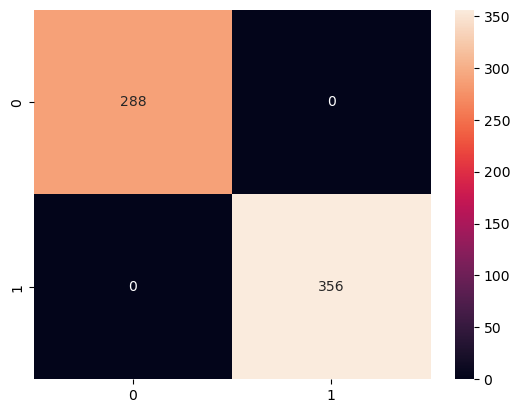

In [60]:
print(accuracy_score(y_train, y_train_pred))
sns.heatmap(confusion_matrix(y_train,y_train_pred),annot=True,fmt='d')

In [61]:
y_test_pred = dtc.predict(X_test)

0.7028985507246377


<Axes: >

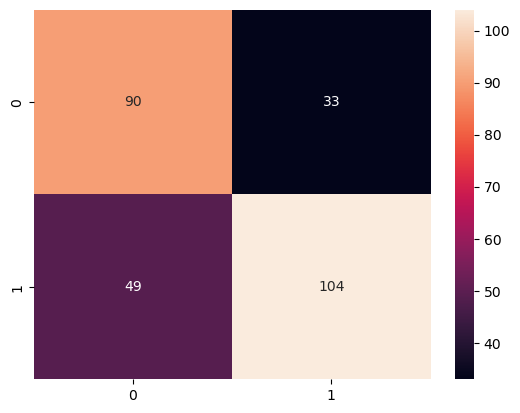

In [62]:
print(accuracy_score(y_test, y_test_pred))
sns.heatmap(confusion_matrix(y_test, y_test_pred),annot=True,fmt='d')

In [63]:
f1_score(y_test, y_test_pred)

0.7172413793103448

#### inference:The training accuracy is 1, but the test accuracy is 0.7355, which clearly indicates that the Decision tree base model is experiencing overfit problem

## Exp 2: RandomForestClassifier - Base Model

In [64]:
rfc = RandomForestClassifier(random_state=0)
rfc.fit(X_train, y_train)


RandomForestClassifier(random_state=0)

In [65]:
y_train_pred = rfc.predict(X_train)

1.0


<Axes: >

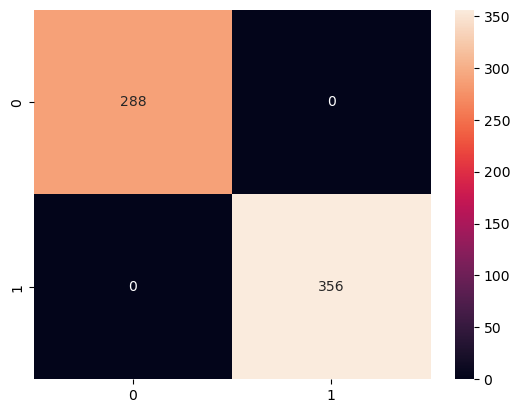

In [66]:
print(accuracy_score(y_train, y_train_pred))
sns.heatmap(confusion_matrix(y_train, y_train_pred),annot=True,fmt='d')

In [67]:
y_test_pred = rfc.predict(X_test)

0.8442028985507246


<Axes: >

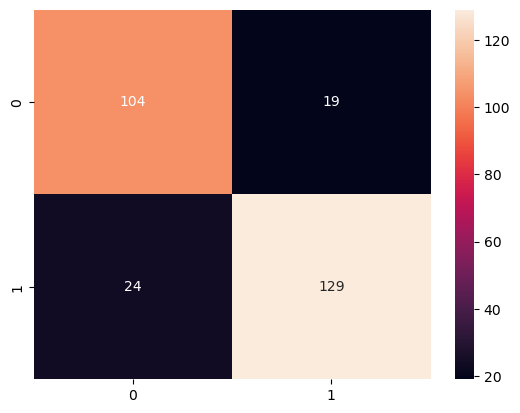

In [68]:
print(accuracy_score(y_test, y_test_pred))
sns.heatmap(confusion_matrix(y_test, y_test_pred),annot=True,fmt='d')

In [69]:
f1_score(y_test, y_test_pred)

0.8571428571428572

#### inference:The training accuracy is 1, but the test accuracy is 0.8369, which clearly indicates that the Random forest base model is experiencing overfit problem

### Hyper-parameter tuning for DecisionTreeClassifier

In [70]:
dtc = DecisionTreeClassifier(random_state=0)

In [71]:
from sklearn.model_selection import GridSearchCV

In [72]:
params = {
    'max_depth': [2, 3, 5, 10, 20],
    'min_samples_leaf': [5, 10, 20, 50, 100],
    'criterion': ["gini", "entropy"]
}

In [73]:
grid_search = GridSearchCV(estimator=dtc, 
                           param_grid=params, 
                           cv=5, n_jobs=-1, verbose=1, scoring = "accuracy")

In [74]:
%%time
grid_search.fit(X_train, y_train)

Fitting 5 folds for each of 50 candidates, totalling 250 fits
CPU times: total: 375 ms
Wall time: 5.83 s


GridSearchCV(cv=5, estimator=DecisionTreeClassifier(random_state=0), n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [2, 3, 5, 10, 20],
                         'min_samples_leaf': [5, 10, 20, 50, 100]},
             scoring='accuracy', verbose=1)

In [75]:
best_dtc=grid_search.best_params_

In [76]:
#best_dtc = {'criterion': 'gini', 'max_depth': 10, 'min_samples_leaf': 20}

In [77]:
best_dtc 

{'criterion': 'gini', 'max_depth': 10, 'min_samples_leaf': 20}

## Exp 3: DecisionTreeClassifier - After Hyperparameter Tuning

In [78]:
dtc = DecisionTreeClassifier(**best_dtc)

In [79]:
dtc.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=10, min_samples_leaf=20)

In [80]:
y_train_pred = dtc.predict(X_train)

0.8322981366459627


<Axes: >

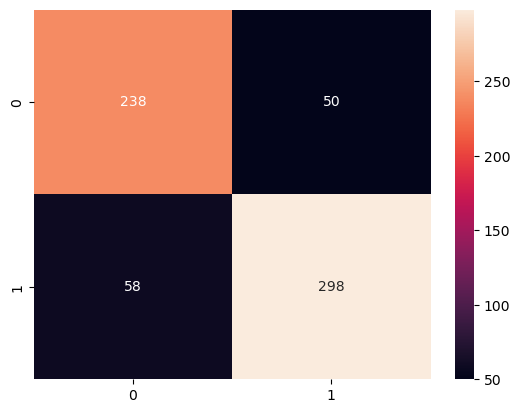

In [81]:
print(accuracy_score(y_train, y_train_pred))
sns.heatmap(confusion_matrix(y_train, y_train_pred),annot=True,fmt='d')

In [82]:
y_test_pred = dtc.predict(X_test)

0.7753623188405797


<Axes: >

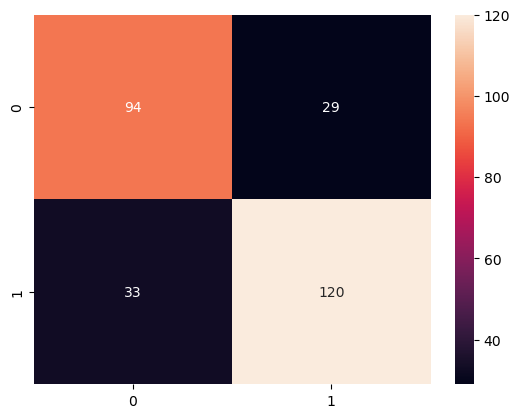

In [83]:
print(accuracy_score(y_test, y_test_pred))
sns.heatmap(confusion_matrix(y_test, y_test_pred),annot=True,fmt='d')

In [84]:
f1_score(y_test, y_test_pred)

0.7947019867549668

#### inference:The training accuracy is 0.8322 , but the test accuracy is 0.7753, which clearly indicates that the DecisionTree after hyperparameter tuning model has learned the pattern well from the training dataset

### Hyper-parameter tuning for  RandomForestClassifier

In [85]:
rfc = RandomForestClassifier(random_state=0)

In [86]:
params = {
    'max_depth': [1, 2, 5, 10, 20],
    'min_samples_leaf': [5, 10, 20, 50, 100],
    'max_features': [2,3,4],
    'n_estimators': [200, 225, 250, 275, 300]
}

In [87]:
grid_search = GridSearchCV(estimator=rfc, param_grid=params, 
                          cv=5, n_jobs=-1, verbose=1, scoring = "accuracy")

In [88]:
%%time
grid_search.fit(X,y)

Fitting 5 folds for each of 375 candidates, totalling 1875 fits
CPU times: total: 8.25 s
Wall time: 4min 11s


GridSearchCV(cv=5, estimator=RandomForestClassifier(random_state=0), n_jobs=-1,
             param_grid={'max_depth': [1, 2, 5, 10, 20],
                         'max_features': [2, 3, 4],
                         'min_samples_leaf': [5, 10, 20, 50, 100],
                         'n_estimators': [200, 225, 250, 275, 300]},
             scoring='accuracy', verbose=1)

In [89]:
best_rfc = grid_search.best_params_

In [90]:
#best_rfc = {'max_depth': 5, 'max_features': 2, 'min_samples_leaf': 5, 'n_estimators': 225}

In [91]:
best_rfc

{'max_depth': 5, 'max_features': 2, 'min_samples_leaf': 5, 'n_estimators': 250}

## Exp 4: RandomForestClassifier - After Hyperparameter Tuning

In [92]:
rfc = RandomForestClassifier(**best_rfc)
rfc.fit(X_train, y_train)

RandomForestClassifier(max_depth=5, max_features=2, min_samples_leaf=5,
                       n_estimators=250)

In [93]:
y_train_pred = rfc.predict(X_train)

0.860248447204969


<Axes: >

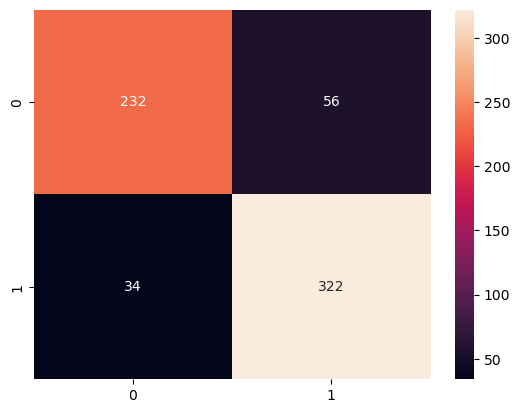

In [94]:
print(accuracy_score(y_train, y_train_pred))
sns.heatmap(confusion_matrix(y_train, y_train_pred),annot=True,fmt='d')

In [95]:
y_test_pred = rfc.predict(X_test)

0.8405797101449275


<Axes: >

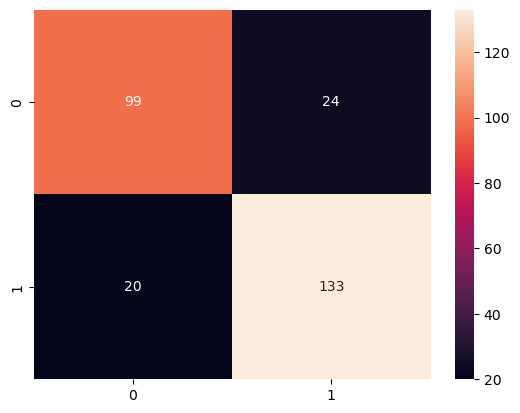

In [96]:
print(accuracy_score(y_test, y_test_pred))
sns.heatmap(confusion_matrix(y_test, y_test_pred),annot=True,fmt='d')

#### inference:The training accuracy is 0.8555, but the test accuracy is 0.8369, which clearly indicates that the Random forest after hyperparameter tuning model has learned the pattern very well from the training dataset

In [97]:
f1_score(y_test, y_test_pred)

0.8580645161290323

# Step 5 - Conclusion :
Random forest classifier with hyperparameter tuning has perfomed very well when compared to all other models
            
                        Accuracy :
                                Train 0.8602
                                Test 0.8405
                                

DecisionTreeClassifier base model: 	
Train accuracy 1.0
Test accuracy 0.7028985507246377

RandomForestClassifier base model:     
Train accuracy 1.0
Test accuracy 0.8442028985507246

DecisionTreeClassifier after hyperparameter tuning:
Train accuracy 0.8322981366459627
Test accuracy 0.7753623188405797

RandomForestClassifier after hyperparameter tuning                                  
Train accuracy 0.860248447204969
Test accuracy 0.8405797101449275